<a href="https://colab.research.google.com/github/GubioGL/Optics/blob/main/Teste_4(Ref_com_modos_diferentes).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Objetivo: Investigar como o deslocamento das Intersidades afetas a visibilidade.

Esse scrypt vamos utilizar como referência. 

Vamos fixar a posição,cintura,
N°de campo = 100, 
Distância de propação = 60*cm.

Modos iguais-> L=..... p =0

In [ ]:
!pip install --upgrade LightPipes
from LightPipes import *
from matplotlib import image
from scipy.fft import fft2, ifft2 ,fftshift
from scipy import special
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import scipy
import random
import PIL
from PIL import Image

     |████████████████████████████████| 50 kB 1.9 MB/s 


In [ ]:
#Pedidno permissão para ter acesso ao drive
from google.colab import drive
drive.mount('/content/drive', True)
SLM  = Image.open('/content/drive/MyDrive/Colab Notebooks/Gubio/512.png')

imgGray = SLM.convert('L')
imgGray.save('imgGray2.png')
imgGra  = plt.imread('imgGray2.png')
ri = imgGra/imgGra.max()

Mounted at /content/drive


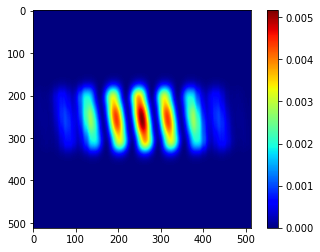

In [ ]:
########################################################################
n    = 2**9 + 1
lamb = 785*nm        
k    = 2*np.pi/lamb        
dx   = 10*um  
########################################################################
dzPar = np.arange(1e-20,100,1)*cm  
z     = dzPar[0]       
###############################################################################
N_inc = 100
i     = 0
SI    = [0]
SIfase= [0]

while (i<N_inc):
  i+=1
########################################################################## 
# Essa parte é responsavel por criar o deslocamento dos campo 
  x  =  np.arange(-n/2+1, n/2,1)*dx
  y  =  np.arange(-n/2+1, n/2,1)*dx
  xx,yy = np.meshgrid(x,y)
##########################################################################

  P = 0
  L = random.randint(0,5)

  w_0 = 0.4*mm         
  z_R = np.pi*w_0**2/lamb 

  r    = np.sqrt(xx**2+yy**2)                                                 
  C    = np.sqrt(2*np.math.factorial(P)/(np.pi*np.math.factorial(P+abs(L))))  
  w    = w_0*np.sqrt(1+(z/z_R)**2)
  R    = z*(1+(z_R/z)**2)
  phi  = (1+2*P+abs(L))*np.arctan(z/z_R)  
  PL   = scipy.special.assoc_laguerre(2*r**2/w**2,P,abs(L))
  Fase = np.exp( -r**2/w**2 - 1j*k*r**2/(2*R) + 1j*phi - 1j*L*np.arctan2(yy,xx) )*np.exp(-1j*k*z)
  LG   = C*w_0/w*(r*np.sqrt(2)/w)**abs(L)*PL*Fase
  
  EE = LG*ri
  F  = Begin(2*abs(x[1]),lamb,n)   # Criando um campo
  Fint       = F.copy(F)           # Criando um campo 
  Fint.field = EE                  # Modulando a D. de Intensidade
  propagação = Forvard(10*cm,Fint)  # Propagando
  imagem     = Intensity(0,propagação)
  SI         = SI + imagem
  #plt.imshow(imagem,cmap='jet')
  #plt.colorbar()
  #plt.show()
  fase = Phase(Fint)
  #plt.imshow(fase,cmap='jet')
  #plt.colorbar()
  #plt.show()
  SIfase     = SIfase + fase

##############################################################################

imagem = SI/N_inc
plt.imshow(imagem,cmap='jet')
plt.colorbar()
plt.show()


#plt.imshow(SIfase,cmap='jet')
#plt.colorbar()
#plt.show()


In [ ]:
F = F.copy(F)
F.field = imagem
f = 50*cm
Fc = CylindricalLens(F,f) #lente

for i in range(50,75,5):
  propagação = Forvard(i*cm,Fc) 
  imagem     = Intensity(0,propagação)
  FAS = Phase(propagação)
  plt.imshow(FAS,cmap='jet');plt.title("Propagation phase after lens");plt.show()

  plt.imshow(imagem,cmap='jet')
  plt.show()

In [ ]:
##### Vizualizar a Divergencia 
II = []
for i in range(0,100):
  propagação = Forvard(i*cm,Fc) 
  imagem     = Intensity(0,propagação)
  I          = imagem[256]
  II.append(I)
  i += 1
plt.imshow(II,cmap='jet')
plt.show()
#########################################################

L = 0


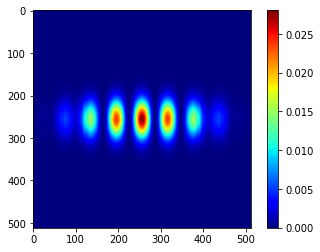

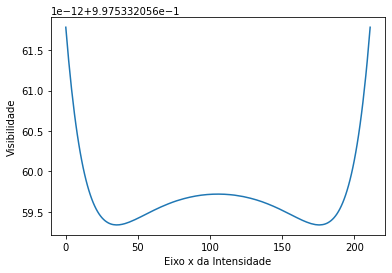

L = 1


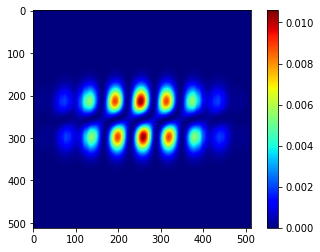

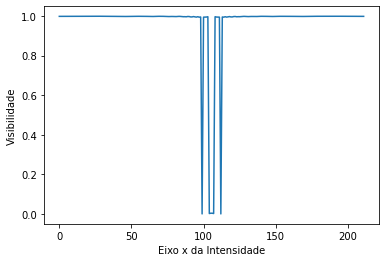

L = 2


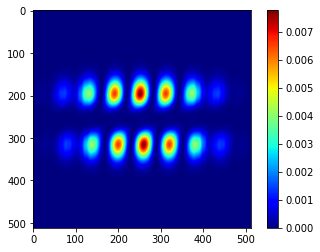

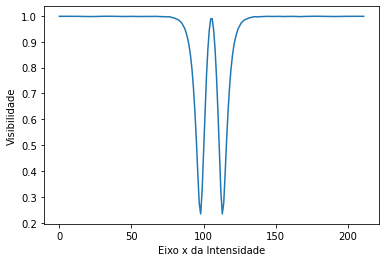

L = 3


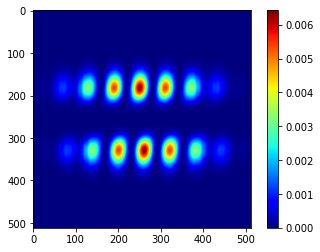

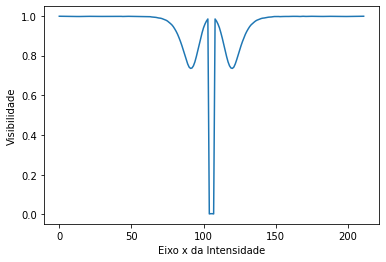

L = 4


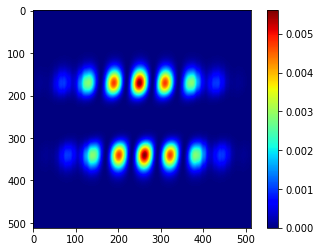

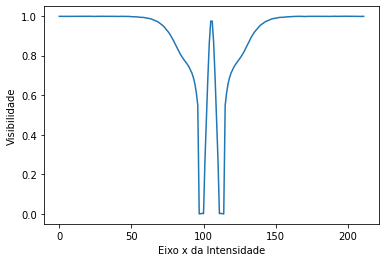

In [ ]:
########################################################################
n    = 2**9 + 1
lamb = 785*nm        
k    = 2*np.pi/lamb        
dx   = 10*um  
########################################################################

dzPar = np.arange(1e-20,100,1)*cm  
z     = dzPar[0]       
ii    = 0

while (ii< 5): 
  N_inc = 100
  i     = 0
  SI    = [0]
  while (i<N_inc):
    i += 1
########################################################################## 
# Essa parte é responsavel por criar o deslocamento dos campo 
    x  =  np.arange(-n/2+1, n/2,1)*dx
    y  =  np.arange(-n/2+1, n/2,1)*dx
    xx,yy = np.meshgrid(x,y)
##########################################################################
    P    = 0
    L    = ii #random.randint(0,5)

    w_0  = 0.6*mm         
    z_R  = np.pi*w_0**2/lamb 

    r    = np.sqrt(xx**2+yy**2)                                                 
    C    = np.sqrt(2*np.math.factorial(P)/(np.pi*np.math.factorial(P+abs(L))))  
    w    = w_0*np.sqrt(1+(z/z_R)**2)
    R    = z*(1+(z_R/z)**2)
    phi  = (1+2*P+abs(L))*np.arctan(z/z_R)  
    PL   = scipy.special.assoc_laguerre(2*r**2/w**2,P,abs(L))
    Fase = np.exp( -r**2/w**2 - 1j*k*r**2/(2*R) + 1j*phi - 1j*L*np.arctan2(yy,xx) )*np.exp(-1j*k*z)
    LG   = C*w_0/w*(r*np.sqrt(2)/w)**abs(L)*PL*Fase
  
    EE   = LG*ri
    F    = Begin(2*abs(x[1]),lamb,n) # Criando um campo
    Fint       = F.copy(F)           # Criando um campo 
    Fint.field = EE                  # Modulando a D. de Intensidade
    propagação = Forvard(10*cm,Fint)# Propagando
    imagem     = Intensity(0,propagação)
    SI         = SI + imagem
    #plt.imshow(imagem,cmap='jet')
    #plt.colorbar()
    #plt.show() 
##############################################################################

  imagem = SI/N_inc
  
  plt.imshow(imagem,cmap='jet');print("L =",ii) 
  plt.colorbar()
  plt.show()
##############################################################################
##############################################################################
    # Ajustado para analisar na Direita e esquerda
    ### Função da Suavização #########################
  def SUAVE(media, linha):
    novalista = []
    for i in range(media ,512,1):
      b = imagem[linha,i-media:i]
      AA = sum(b)/media
      novalista.append(AA)
    return np.array(novalista)

  def MM(suavizar,linha):
    maxi2 = SUAVE(suavizar,linha).max()
    posiçao2 = 0
    for i in SUAVE(suavizar,linha):
      if i == maxi2:
        break 
      posiçao2 +=1 
    #### Encontrar o valor mínimo local a Direita parti do máximo global
    mini = 0
    Vimax = SUAVE(suavizar,linha)[posiçao2:512]
    for i in range(len(Vimax)):
      if i == len(Vimax)-1:
        break
      if Vimax[i] > Vimax[i+1]:
        mini = Vimax[i+1]
      elif Vimax[i] < Vimax[i+1]:
        mini = Vimax[i]
        break   
    # Vamos encontrar o posição no qual temos mínimo
    PMin = 0 
    for i in Vimax:
      if i == mini:
        break 
      PMin += 1  
    posiçaomin = posiçao2 + PMin -1
  #######################################################################
  #### Encontrar o valor mínimo local a ESQUERDA a parti do maximo lobal
    miniE = 0
    xamiV = SUAVE(suavizar,linha)[0:posiçao2]
  #########################################################
    for i in range(len(xamiV)):
      i += 1
      if i == len(xamiV)-1:
        break
      if xamiV[-i] > xamiV[-i-1]:
        miniE = xamiV[-i-1]
      elif xamiV[-i] < xamiV[-i-1]:
        miniE = xamiV[-i]
        break   
  # Vamos encontrar o posição no qual temos mínimo
    PMinE = 0 
    for i in range(len(xamiV)):
      i+=1
      if xamiV[-i] == miniE: 
        break 
      PMinE += 1  
    posiçaominE = posiçao2 - PMinE

    if miniE > mini:
      posiçaomin = posiçaominE
      mini       = miniE
    # [0] = Valor max,[1] = Posição max ,[2] = Valor Min,[3] = Posição Min
    return maxi2, posiçao2, mini, posiçaomin  #,miniE, posiçaominE 
##############################################################################
##############################################################################
# A VISIBILIDADE TODA
  VisibilidadeN = []
  q= 2
  for j in range(150,362):
    V = ( MM(q,j)[0]  - MM(q,j)[2] )/( MM(q,j)[0]  + MM(q,j)[2])
    VisibilidadeN.append(V) 
  
  plt.plot(VisibilidadeN) 
  plt.xlabel('Eixo x da Intensidade')
  plt.ylabel("Visibilidade")
  plt.show()

  ii += 1

L = 1


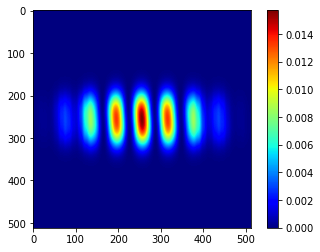

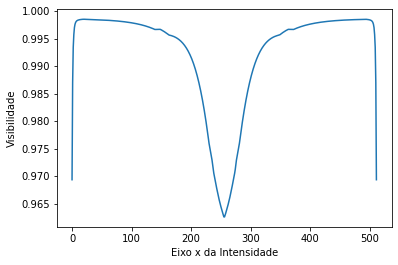

L = 2


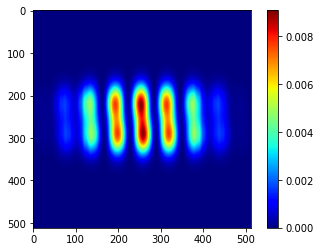

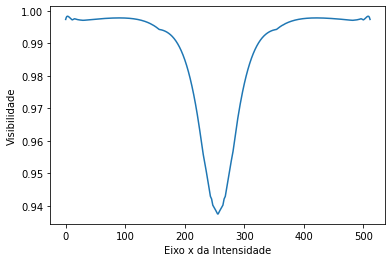

L = 3


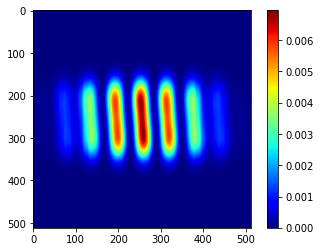

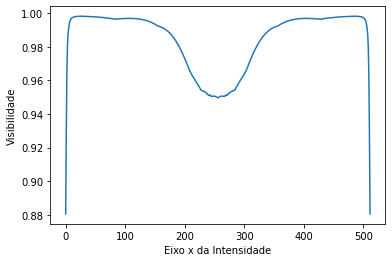

L = 4


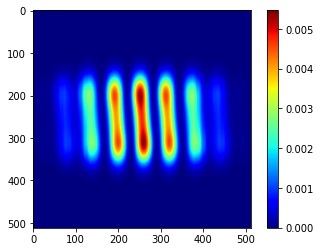

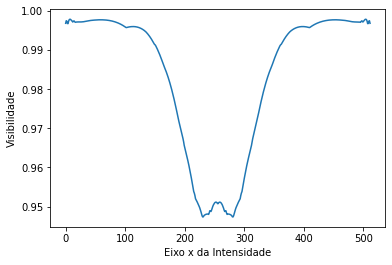

L = 5


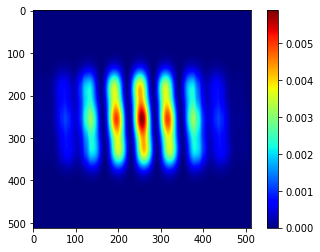

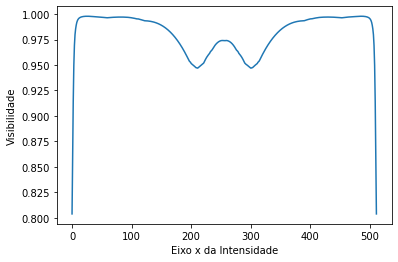

L = 6


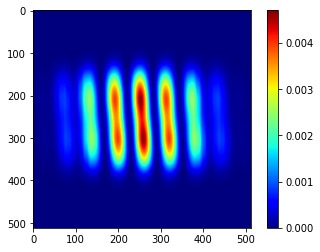

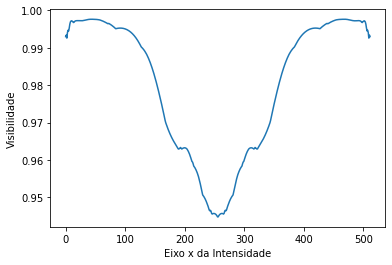

In [ ]:
########################################################################
n    = 2**9 + 1
lamb = 785*nm        
k    = 2*np.pi/lamb        
dx   = 10*um  
########################################################################

dzPar = np.arange(1e-20,100,1)*cm  
z     = dzPar[0]       
ii    = 0

while (ii< 6): 
  ii += 1
  N_inc = 100
  i     = 0
  SI    = [0]
  while (i<N_inc):
    i += 1
########################################################################## 
# Essa parte é responsavel por criar o deslocamento dos campo 
    x  =  np.arange(-n/2+1, n/2,1)*dx
    y  =  np.arange(-n/2+1, n/2,1)*dx
    xx,yy = np.meshgrid(x,y)
##########################################################################
    P    = 0
    L    = random.randint(0,ii)

    w_0  = 0.6*mm         
    z_R  = np.pi*w_0**2/lamb 

    r    = np.sqrt(xx**2+yy**2)                                                 
    C    = np.sqrt(2*np.math.factorial(P)/(np.pi*np.math.factorial(P+abs(L))))  
    w    = w_0*np.sqrt(1+(z/z_R)**2)
    R    = z*(1+(z_R/z)**2)
    phi  = (1+2*P+abs(L))*np.arctan(z/z_R)  
    PL   = scipy.special.assoc_laguerre(2*r**2/w**2,P,abs(L))
    Fase = np.exp( -r**2/w**2 - 1j*k*r**2/(2*R) + 1j*phi - 1j*L*np.arctan2(yy,xx) )*np.exp(-1j*k*z)
    LG   = C*w_0/w*(r*np.sqrt(2)/w)**abs(L)*PL*Fase
  
    EE   = LG*ri
    F    = Begin(2*abs(x[1]),lamb,n) # Criando um campo
    Fint       = F.copy(F)           # Criando um campo 
    Fint.field = EE                  # Modulando a D. de Intensidade
    propagação = Forvard(10*cm,Fint)# Propagando
    imagem     = Intensity(0,propagação)
    SI         = SI + imagem
    #plt.imshow(imagem,cmap='jet')
    #plt.colorbar()
    #plt.show() 
##############################################################################

  imagem = SI/N_inc
  
  plt.imshow(imagem,cmap='jet');print("L =",ii) 
  plt.colorbar()
  plt.show()
  
  #fase = Phase(imagem)
  #plt.imshow(fase,cmap='jet')
  #plt.colorbar()
  #plt.show()
##############################################################################
##############################################################################
    # Ajustado para analisar na Direita e esquerda
    ### Função da Suavização #########################
  def SUAVE(media, linha):
    novalista = []
    for i in range(media ,512,1):
      b = imagem[linha,i-media:i]
      AA = sum(b)/media
      novalista.append(AA)
    return np.array(novalista)

  def MM(suavizar,linha):
    maxi2 = SUAVE(suavizar,linha).max()
    posiçao2 = 0
    for i in SUAVE(suavizar,linha):
      if i == maxi2:
        break 
      posiçao2 +=1 
    #### Encontrar o valor mínimo local a Direita parti do máximo global
    mini = 0
    Vimax = SUAVE(suavizar,linha)[posiçao2:512]
    for i in range(len(Vimax)):
      if i == len(Vimax)-1:
        break
      if Vimax[i] > Vimax[i+1]:
        mini = Vimax[i+1]
      elif Vimax[i] < Vimax[i+1]:
        mini = Vimax[i]
        break   
    # Vamos encontrar o posição no qual temos mínimo
    PMin = 0 
    for i in Vimax:
      if i == mini:
        break 
      PMin += 1  
    posiçaomin = posiçao2 + PMin -1
  #######################################################################
  #### Encontrar o valor mínimo local a ESQUERDA a parti do maximo lobal
    miniE = 0
    xamiV = SUAVE(suavizar,linha)[0:posiçao2]
  #########################################################
    for i in range(len(xamiV)):
      i += 1
      if i == len(xamiV)-1:
        break
      if xamiV[-i] > xamiV[-i-1]:
        miniE = xamiV[-i-1]
      elif xamiV[-i] < xamiV[-i-1]:
        miniE = xamiV[-i]
        break   
  # Vamos encontrar o posição no qual temos mínimo
    PMinE = 0 
    for i in range(len(xamiV)):
      i+=1
      if xamiV[-i] == miniE: 
        break 
      PMinE += 1  
    posiçaominE = posiçao2 - PMinE

    if miniE > mini:
      posiçaomin = posiçaominE
      mini       = miniE
    # [0] = Valor max,[1] = Posição max ,[2] = Valor Min,[3] = Posição Min
    return maxi2, posiçao2, mini, posiçaomin  #,miniE, posiçaominE 
##############################################################################
##############################################################################
# A VISIBILIDADE TODA
  VisibilidadeN = []
  q= 2
  for j in range(0,512):
    V = ( MM(q,j)[0]  - MM(q,j)[2] )/( MM(q,j)[0]  + MM(q,j)[2])
    VisibilidadeN.append(V) 
  
  plt.plot(VisibilidadeN) 
  plt.xlabel('Eixo x da Intensidade')
  plt.ylabel("Visibilidade")
  plt.show()

L = 2


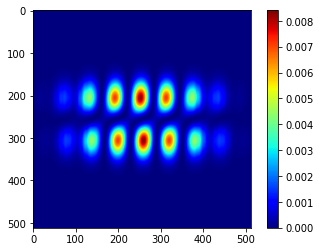

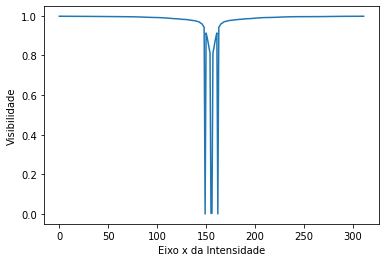

L = 3


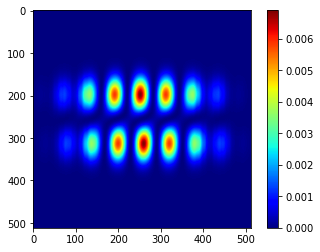

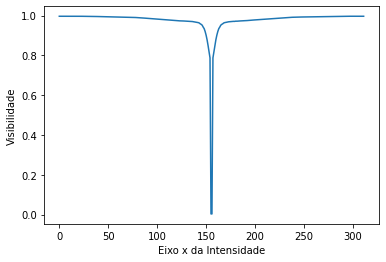

L = 4


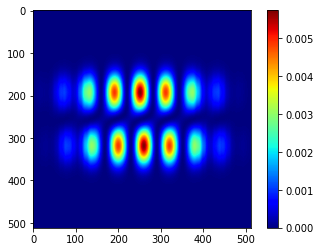

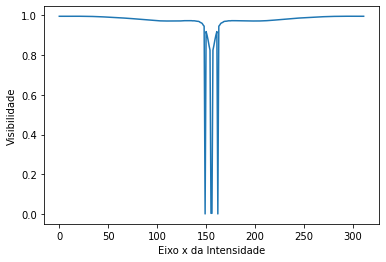

In [ ]:
########################################################################
n    = 2**9 + 1
lamb = 785*nm        
k    = 2*np.pi/lamb        
dx   = 10*um  
########################################################################

dzPar = np.arange(1e-20,100,1)*cm  
z     = dzPar[0]       
ii    = 2

while (ii< 5): 
  N_inc = 100
  i     = 0
  SI    = [0]
  while (i<N_inc):
    i += 1
########################################################################## 
# Essa parte é responsavel por criar o deslocamento dos campo 
    x  =  np.arange(-n/2+1, n/2,1)*dx
    y  =  np.arange(-n/2+1, n/2,1)*dx
    xx,yy = np.meshgrid(x,y)
##########################################################################
    P    = 0
    L    = random.randint(1,ii)

    w_0  = 0.6*mm         
    z_R  = np.pi*w_0**2/lamb 

    r    = np.sqrt(xx**2+yy**2)                                                 
    C    = np.sqrt(2*np.math.factorial(P)/(np.pi*np.math.factorial(P+abs(L))))  
    w    = w_0*np.sqrt(1+(z/z_R)**2)
    R    = z*(1+(z_R/z)**2)
    phi  = (1+2*P+abs(L))*np.arctan(z/z_R)  
    PL   = scipy.special.assoc_laguerre(2*r**2/w**2,P,abs(L))
    Fase = np.exp( -r**2/w**2 - 1j*k*r**2/(2*R) + 1j*phi - 1j*L*np.arctan2(yy,xx) )*np.exp(-1j*k*z)
    LG   = C*w_0/w*(r*np.sqrt(2)/w)**abs(L)*PL*Fase
  
    EE   = LG*ri
    F    = Begin(2*abs(x[1]),lamb,n) # Criando um campo
    Fint       = F.copy(F)           # Criando um campo 
    Fint.field = EE                  # Modulando a D. de Intensidade
    propagação = Forvard(10*cm,Fint)# Propagando
    imagem     = Intensity(0,propagação)
    SI         = SI + imagem
    #plt.imshow(imagem,cmap='jet')
    #plt.colorbar()
    #plt.show() 
##############################################################################

  imagem = SI/N_inc
  
  plt.imshow(imagem,cmap='jet');print("L =",ii) 
  plt.colorbar()
  plt.show()
  
  #fase = Phase(imagem)
  #plt.imshow(fase,cmap='jet')
  #plt.colorbar()
  #plt.show()
##############################################################################
##############################################################################
    # Ajustado para analisar na Direita e esquerda
    ### Função da Suavização #########################
  def SUAVE(media, linha):
    novalista = []
    for i in range(media ,512,1):
      b = imagem[linha,i-media:i]
      AA = sum(b)/media
      novalista.append(AA)
    return np.array(novalista)

  def MM(suavizar,linha):
    maxi2 = SUAVE(suavizar,linha).max()
    posiçao2 = 0
    for i in SUAVE(suavizar,linha):
      if i == maxi2:
        break 
      posiçao2 +=1 
    #### Encontrar o valor mínimo local a Direita parti do máximo global
    mini = 0
    Vimax = SUAVE(suavizar,linha)[posiçao2:512]
    for i in range(len(Vimax)):
      if i == len(Vimax)-1:
        break
      if Vimax[i] > Vimax[i+1]:
        mini = Vimax[i+1]
      elif Vimax[i] < Vimax[i+1]:
        mini = Vimax[i]
        break   
    # Vamos encontrar o posição no qual temos mínimo
    PMin = 0 
    for i in Vimax:
      if i == mini:
        break 
      PMin += 1  
    posiçaomin = posiçao2 + PMin -1
  #######################################################################
  #### Encontrar o valor mínimo local a ESQUERDA a parti do maximo lobal
    miniE = 0
    xamiV = SUAVE(suavizar,linha)[0:posiçao2]
  #########################################################
    for i in range(len(xamiV)):
      i += 1
      if i == len(xamiV)-1:
        break
      if xamiV[-i] > xamiV[-i-1]:
        miniE = xamiV[-i-1]
      elif xamiV[-i] < xamiV[-i-1]:
        miniE = xamiV[-i]
        break   
  # Vamos encontrar o posição no qual temos mínimo
    PMinE = 0 
    for i in range(len(xamiV)):
      i+=1
      if xamiV[-i] == miniE: 
        break 
      PMinE += 1  
    posiçaominE = posiçao2 - PMinE

    if miniE > mini:
      posiçaomin = posiçaominE
      mini       = miniE
    # [0] = Valor max,[1] = Posição max ,[2] = Valor Min,[3] = Posição Min
    return maxi2, posiçao2, mini, posiçaomin  #,miniE, posiçaominE 
##############################################################################
##############################################################################
# A VISIBILIDADE TODA
  VisibilidadeN = []
  q= 2
  for j in range(100,412):
    V = ( MM(q,j)[0]  - MM(q,j)[2] )/( MM(q,j)[0]  + MM(q,j)[2])
    VisibilidadeN.append(V) 
  
  plt.plot(VisibilidadeN) 
  plt.xlabel('Eixo x da Intensidade')
  plt.ylabel("Visibilidade")
  plt.show()
  ii += 1

L = 3


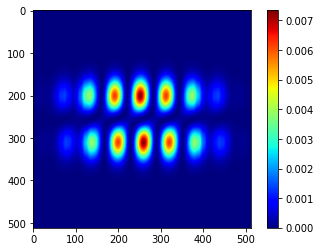

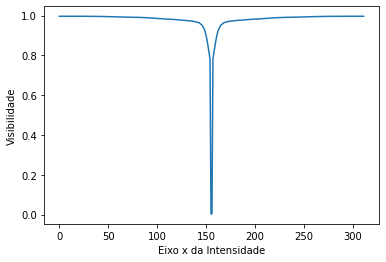

L = 4


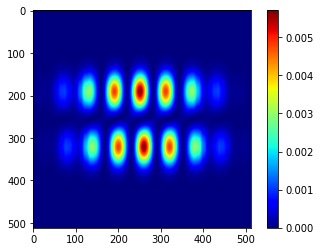

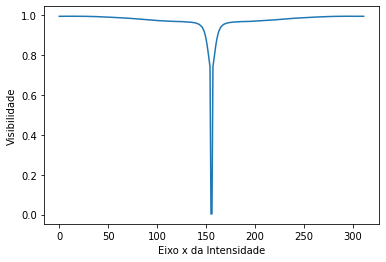

In [ ]:
########################################################################
n    = 2**9 + 1
lamb = 785*nm        
k    = 2*np.pi/lamb        
dx   = 10*um  
########################################################################

dzPar = np.arange(1e-20,100,1)*cm  
z     = dzPar[0]       
ii    = 3

while (ii< 5): 
  N_inc = 100
  i     = 0
  SI    = [0]
  while (i<N_inc):
    i += 1
########################################################################## 
# Essa parte é responsavel por criar o deslocamento dos campo 
    x  =  np.arange(-n/2+1, n/2,1)*dx
    y  =  np.arange(-n/2+1, n/2,1)*dx
    xx,yy = np.meshgrid(x,y)
##########################################################################
    P    = 0
    L    = random.randint(1,ii)

    w_0  = 0.6*mm         
    z_R  = np.pi*w_0**2/lamb 

    r    = np.sqrt(xx**2+yy**2)                                                 
    C    = np.sqrt(2*np.math.factorial(P)/(np.pi*np.math.factorial(P+abs(L))))  
    w    = w_0*np.sqrt(1+(z/z_R)**2)
    R    = z*(1+(z_R/z)**2)
    phi  = (1+2*P+abs(L))*np.arctan(z/z_R)  
    PL   = scipy.special.assoc_laguerre(2*r**2/w**2,P,abs(L))
    Fase = np.exp( -r**2/w**2 - 1j*k*r**2/(2*R) + 1j*phi - 1j*L*np.arctan2(yy,xx) )*np.exp(-1j*k*z)
    LG   = C*w_0/w*(r*np.sqrt(2)/w)**abs(L)*PL*Fase
  
    EE   = LG*ri
    F    = Begin(2*abs(x[1]),lamb,n) # Criando um campo
    Fint       = F.copy(F)           # Criando um campo 
    Fint.field = EE                  # Modulando a D. de Intensidade
    propagação = Forvard(10*cm,Fint)# Propagando
    imagem     = Intensity(0,propagação)
    SI         = SI + imagem
    #plt.imshow(imagem,cmap='jet')
    #plt.colorbar()
    #plt.show() 
##############################################################################

  imagem = SI/N_inc
  
  plt.imshow(imagem,cmap='jet');print("L =",ii) 
  plt.colorbar()
  plt.show()
  
  #fase = Phase(imagem)
  #plt.imshow(fase,cmap='jet')
  #plt.colorbar()
  #plt.show()
##############################################################################
##############################################################################
    # Ajustado para analisar na Direita e esquerda
    ### Função da Suavização #########################
  def SUAVE(media, linha):
    novalista = []
    for i in range(media ,512,1):
      b = imagem[linha,i-media:i]
      AA = sum(b)/media
      novalista.append(AA)
    return np.array(novalista)

  def MM(suavizar,linha):
    maxi2 = SUAVE(suavizar,linha).max()
    posiçao2 = 0
    for i in SUAVE(suavizar,linha):
      if i == maxi2:
        break 
      posiçao2 +=1 
    #### Encontrar o valor mínimo local a Direita parti do máximo global
    mini = 0
    Vimax = SUAVE(suavizar,linha)[posiçao2:512]
    for i in range(len(Vimax)):
      if i == len(Vimax)-1:
        break
      if Vimax[i] > Vimax[i+1]:
        mini = Vimax[i+1]
      elif Vimax[i] < Vimax[i+1]:
        mini = Vimax[i]
        break   
    # Vamos encontrar o posição no qual temos mínimo
    PMin = 0 
    for i in Vimax:
      if i == mini:
        break 
      PMin += 1  
    posiçaomin = posiçao2 + PMin -1
  #######################################################################
  #### Encontrar o valor mínimo local a ESQUERDA a parti do maximo lobal
    miniE = 0
    xamiV = SUAVE(suavizar,linha)[0:posiçao2]
  #########################################################
    for i in range(len(xamiV)):
      i += 1
      if i == len(xamiV)-1:
        break
      if xamiV[-i] > xamiV[-i-1]:
        miniE = xamiV[-i-1]
      elif xamiV[-i] < xamiV[-i-1]:
        miniE = xamiV[-i]
        break   
  # Vamos encontrar o posição no qual temos mínimo
    PMinE = 0 
    for i in range(len(xamiV)):
      i+=1
      if xamiV[-i] == miniE: 
        break 
      PMinE += 1  
    posiçaominE = posiçao2 - PMinE

    if miniE > mini:
      posiçaomin = posiçaominE
      mini       = miniE
    # [0] = Valor max,[1] = Posição max ,[2] = Valor Min,[3] = Posição Min
    return maxi2, posiçao2, mini, posiçaomin  #,miniE, posiçaominE 
##############################################################################
##############################################################################
# A VISIBILIDADE TODA
  VisibilidadeN = []
  q= 2
  for j in range(100,412):
    V = ( MM(q,j)[0]  - MM(q,j)[2] )/( MM(q,j)[0]  + MM(q,j)[2])
    VisibilidadeN.append(V) 
  
  plt.plot(VisibilidadeN) 
  plt.xlabel('Eixo x da Intensidade')
  plt.ylabel("Visibilidade")
  plt.show()
  ii += 1